<a href="https://colab.research.google.com/github/udhaysiva/Airbnb-Bookings-Analysis/blob/main/Udhayaraj_S_Airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [ ]:
# Importing Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
!pip install haversine
import haversine as hs
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# mounting of google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Importing Data set from Drive 
df=pd.read_csv('/content/drive/MyDrive/EDA/Airbnb NYC 2019.csv')

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
#descriptive statistics summary
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Inference**

From the above output we came to know that the average price of the rooms 7.012 and minimum_nights is 7.012

#Finding null values



In [ ]:
# Finding of Null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Inference**

  From the isnull() merthod we can know that there are some null values from the name and host_name. So let us drop the rows which is contain NaN values.

In [ ]:
# Droping the rows which is having NaN values in name and host_name
df.dropna(axis=0 , subset=['name','host_name'], inplace=True)

Now we have rows which is having non null values in the all columns except last_review and reviews_per_month. 

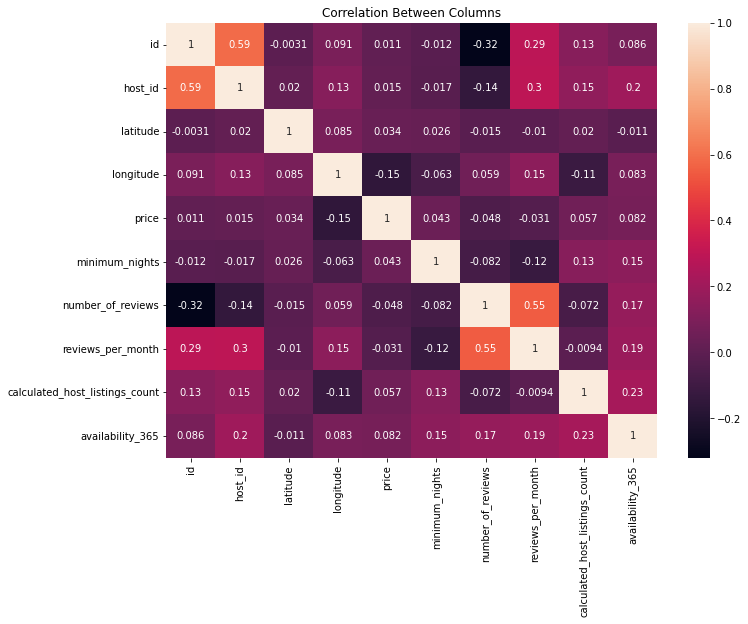

In [ ]:
# Finding Correlation between each Columns
Correlation = df.corr()
plt.figure(figsize=(11,8))
plt.title("Correlation Between Columns")
sns.heatmap(Correlation, annot=True)
plt.show()

**Inference**

There is no significant corelation between any other columns except Id with host_id and number_of_reviews with reviws_per_month.

In [ ]:
# Available columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Now we can drop the columns wich is not used for our analysis**

In [ ]:

df.drop(['availability_365','calculated_host_listings_count','reviews_per_month','last_review','last_review','number_of_reviews','minimum_nights','price'],axis=1,inplace=True)

**Now we going to check the duplicate**

In [ ]:
# Code to check duplicate rows
x=pd.DataFrame(index=['Duplicate rows'], columns=['number of column'])
x['number of column']=df.duplicated().sum()
x

,number of column
Duplicate rows,0


There is no duplicated rows so we move into the analysis part

#Analysis

#Top 2 guys who is having more number of rooms

Here the host_id is is the unique one. so we will take host_id as a subset value and We will take top 2 peaoples who is having more number of rooms for our analysis

In [ ]:
# Finding Top 2 Peoples
room_counts=df.value_counts(subset='host_id').reset_index()
room_counts.rename(columns={0:'room_count'} , inplace=True)
room_counts.head(2)

,host_id,room_count
0,219517861,327
1,107434423,232


**Inference**

The top 2 peoples are host_id **'219517861'** and **'107434423'** . The both might be doing this as a professionally. 

###**Lets analyse the host id of '219517861' which is No_1**

In [ ]:
# Filter the rows with the use of host_id.
No_1=df[df['host_id']==219517861]
No_1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt
...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt


**Inference**

From the above dataframe we can see that the host id **219517861**  having 327 rooms and his name is **Sonder (NYC)**.

____________________________________________________________

We will use longitude and latitude to show the locations of the each appartments with respect to neighbourhood and neighbourhood_group in scatterplot.

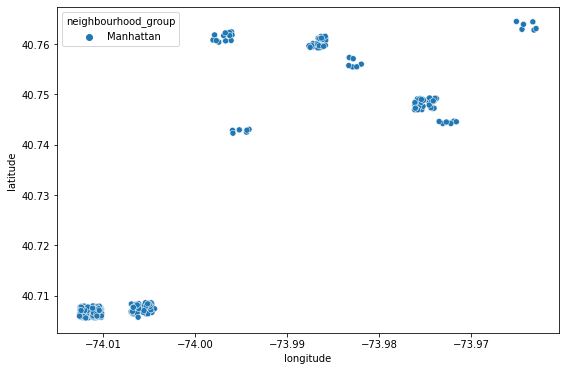

In [ ]:
# Finding Sonder (NYC) rooms with respective to the neighbourhood_group
plt.figure(figsize=(9,6))
sns.scatterplot(x=No_1.longitude,y=No_1.latitude,hue=No_1.neighbourhood_group)

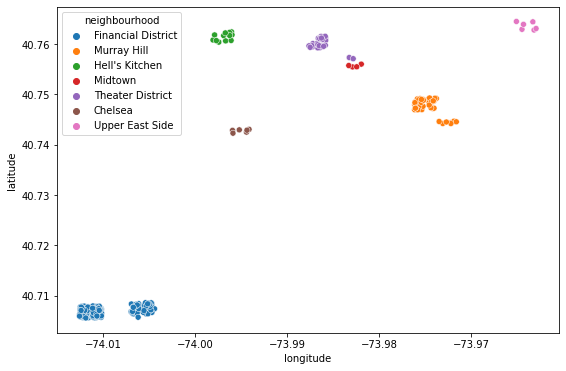

In [ ]:
# Finding Sonder (NYC) rooms with respective to the neighbourhood
plt.figure(figsize=(9,6))
sns.scatterplot(x=No_1.longitude,y=No_1.latitude,hue=No_1.neighbourhood)

**Inference**

The Sonder (NYC) having the rooms only at Manhattan neighbourhood group. In manhatten he has rooms in seven different type of neighbourhoods

###Appartment radius for the ***Sonder (NYC)***

In order to find the distance range for sonder NYC we going to add both longitude and latitude to find the minimum and maximum distance.

In [ ]:
# Finding minimum and maximum geographic coordinate from the scatter plot
No_1['new']=No_1['longitude']+ No_1['latitude']
Distance = No_1.sort_values(by='new').reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Indexing first and last geographic coordinate
latitude1=Distance['latitude'][0]
longitude1=Distance['longitude'][0]
latitude2=Distance['latitude'][326]
longitude2=Distance['longitude'][326]

In [ ]:
# Code to find the distance from the first and last location
location1=(latitude1,longitude1)
location2=(latitude2,longitude2)
hs.haversine(location1,location2)/2

3.8607868957777223

**Inference**
  
  All the rooms of the Sonder (NYC) are available within the radius of 3.8kms.

____________________________________________________________________

###Lets analyse the host id of '107434423' which is No_2

In [ ]:
# Filter the rows with the use of host_id.
No_2=df[df['host_id']==107434423]
No_2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type
26137,20845031,"Homey Midtown East 1BR w/ Gym, Doorman, near t...",107434423,Blueground,Manhattan,Kips Bay,40.74510,-73.97915,Entire home/apt
29128,22370388,"Calming FiDi 1BR w/ lux Gym, Speakeasy + Doorm...",107434423,Blueground,Manhattan,Financial District,40.70637,-74.00941,Entire home/apt
30158,23264421,"Mod Midtown East 1BR w/ Gym, walk to Grand Cen...",107434423,Blueground,Manhattan,Murray Hill,40.74900,-73.97961,Entire home/apt
30428,23538486,"Posh Park Avenue 1BR w/ Gym, Doorman in Midtow...",107434423,Blueground,Manhattan,Murray Hill,40.74891,-73.97887,Entire home/apt
31506,24535218,"Luxury Tribeca 1BR w/ Gym, Doorman + Roof deck...",107434423,Blueground,Manhattan,Tribeca,40.71433,-74.01073,Entire home/apt
...,...,...,...,...,...,...,...,...,...
48723,36404684,Smart Nolita 1BR w/ W/D near famous cafes by B...,107434423,Blueground,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt
48724,36404784,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt
48725,36404815,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt
48726,36404936,Beautiful Williamsburg 2BR w/ Skyline views + ...,107434423,Blueground,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt


**Inference**

From the above dataframe we can know that the host_id '**107434423**' having 232 no. of rooms and his name is Blueground 

________________________________________________________________

We will use longitude and latitude to show the locations of the each appartments with respect to neighbourhood and
neighbourhood_group in scatterplot.

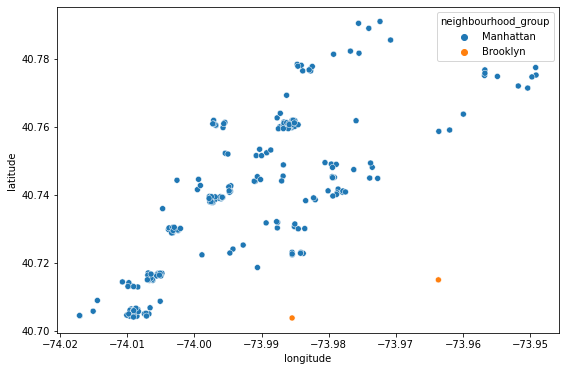

In [ ]:
# Finding Blueground rooms with respective to the neighbourhood_group
plt.figure(figsize=(9,6))
sns.scatterplot(x=No_2.longitude,y=No_2.latitude,hue=No_2.neighbourhood_group)

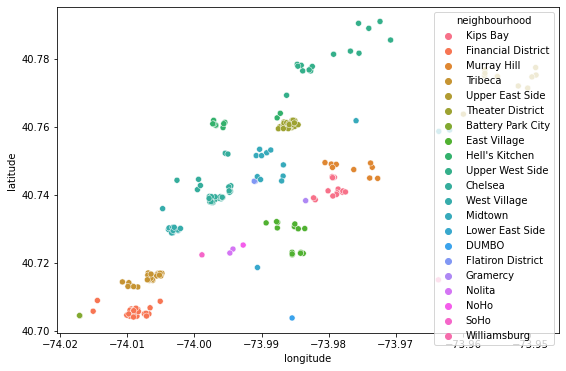

In [ ]:
# Finding Blueground rooms with respective to the neighbourhood
plt.figure(figsize=(9,6))
sns.scatterplot(x=No_2.longitude,y=No_2.latitude,hue=No_2.neighbourhood)

**Inference**

The Blueground having the rooms at two neighbourhood_group which is Manhattan and Brooklyn neighbourhood_group. In manhatten and Brooklyn he has rooms in Twenty one different neighbourhoods

###Appartment radius for the Blueground rooms

In order to find the distance range for Blueground we going to add both longitude and latitude to find the minimum and maximum
distance.

In [ ]:
# Finding minimum and maximum geographic coordinate from the scatter plot
No_2['new']=No_2['longitude']+ No_2['latitude']
Distance = No_2.sort_values(by='new').reset_index()
Distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,new
0,35685,28329243,"Attractive FiDi 1BR w/ Office nook + Gym, Door...",107434423,Blueground,Manhattan,Battery Park City,40.70438,-74.01708,Entire home/apt,-33.31270
1,38767,30393342,"Neat FiDi Studio w/ Gym, Doorman, + Roof deck ...",107434423,Blueground,Manhattan,Battery Park City,40.70444,-74.01712,Entire home/apt,-33.31268
2,38812,30394518,Opulent FiDi Studio w/ Great Rooftop + Gym by ...,107434423,Blueground,Manhattan,Financial District,40.70571,-74.01509,Entire home/apt,-33.30938
3,38761,30393171,Airy + Bright FiDi Studio w/ Gym + Doorman by ...,107434423,Blueground,Manhattan,Financial District,40.70887,-74.01446,Entire home/apt,-33.30559
4,38773,30393464,"Superb FiDi 1BR w/ City views, Gym + Doorman b...",107434423,Blueground,Manhattan,Financial District,40.70455,-74.01008,Entire home/apt,-33.30553
...,...,...,...,...,...,...,...,...,...,...,...
227,37994,30031616,Bright UES 1BR w/Doorman 15m walk to Central P...,107434423,Blueground,Manhattan,Upper East Side,40.77196,-73.95175,Entire home/apt,-33.17979
228,38864,30421561,"Ideal UES 1BR w/ Doorman, near Central Park by...",107434423,Blueground,Manhattan,Upper East Side,40.77135,-73.95035,Entire home/apt,-33.17900
229,40543,31435734,"Sharp UES 1BR w/Indoor pool, Doorman + City vi...",107434423,Blueground,Manhattan,Upper East Side,40.77463,-73.94972,Entire home/apt,-33.17509
230,38708,30388352,"Lofty UES 1BR w/ Indoor pool, Doorman, City vi...",107434423,Blueground,Manhattan,Upper East Side,40.77518,-73.94910,Entire home/apt,-33.17392


In [ ]:
# Indexing first and last geographic coordinate
latitude1=Distance['latitude'][0]
longitude1=Distance['longitude'][0]
latitude2=Distance['latitude'][231]
longitude2=Distance['longitude'][231]

In [ ]:
# Code to find the distance from the first and last location 
location1=(latitude1,longitude1)
location2=(latitude2,longitude2)
hs.haversine(location1,location2)/2

4.9661643590625415

All the rooms of Blueground are available within the radius of 4.9kms.

_______________________________________________________________________________

###Which type of room is more in number?

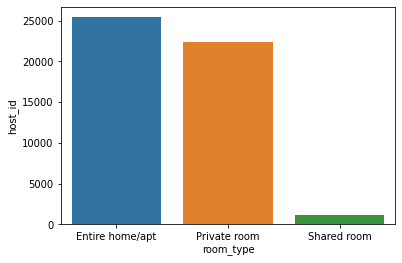

In [ ]:
# Codes to find total number of rooms with respect to each room type
room_type_count=df.groupby('room_type').host_id.count().reset_index()
sns.barplot(data=room_type_count , x='room_type' , y='host_id')


**Inference**
      
Entire home/apt is more in number followed by private room and shared room.

### Relationship between room type and neighbourhood group.

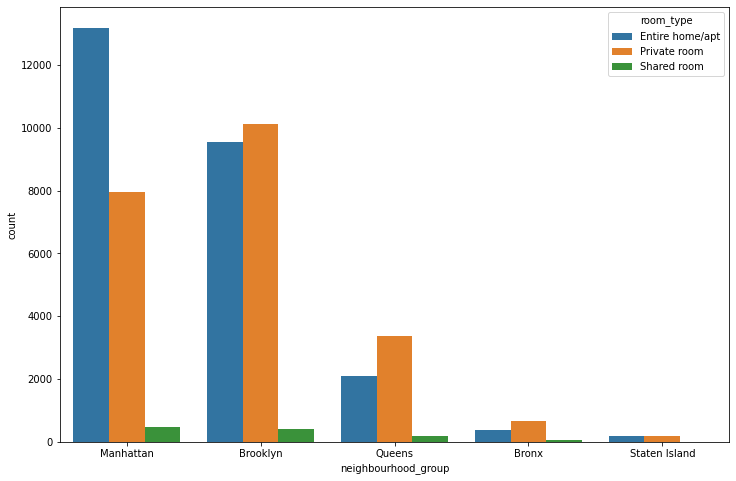

In [ ]:
# Differentiate each neighbourhood_group with respect to the room_type
neighbourhood_group_room_type=df[['neighbourhood_group','room_type']].value_counts().reset_index()
neighbourhood_group_room_type.rename(columns = {0:'count'}, inplace = True)
plt.figure(figsize=(12,8))
sns.barplot(data=neighbourhood_group_room_type, x='neighbourhood_group' , y='count', hue='room_type')

**Inference**

From the above barplot we can conclude that the maximum number of entire home/apt provided by the manhatten neighbourhood_group and the second place taken by the brooklyn next to that queens. the least number of rooms available in staten island. 

_______________________________________________________________________________________________